# Convert and Aggregate extraced time across multiple traces

In [31]:
import os
import pandas as pd
import subprocess
import re
import matplotlib
from matplotlib import pyplot as plt

## Convert traces to JSON

In [32]:
!python3 convertTraces.py --dir logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816

Converting Nsight Systems traces to JSON. v0.01.
Have 506 trace files.
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs100_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs100_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs100_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs10_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs6_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs6_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs6_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs70_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs70_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_r

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-256-1-0-1_bs15_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-256-1-0-1_bs15_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-256-1-0-1_bs15_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-256-1-0-1_bs20_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-256-1-0-1_bs20_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_res

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-512-1-0-1_bs10_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-512-1-0-1_bs10_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-512-1-0-1_bs10_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-512-1-0-1_bs110_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-512-1-0-1_bs110_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_r

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-512-1-0-1_bs70_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-512-1-0-1_bs70_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-512-1-0-1_bs70_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-512-1-0-1_bs7_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-512-1-0-1_bs7_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resne

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-256-1024-1-0-1_bs30_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-256-1024-1-0-1_bs30_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-256-1024-1-0-1_bs30_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-256-1024-1-0-1_bs40_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-256-1024-1-0-1_bs40_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_res

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-256-256-3-1-1_bs120_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-256-256-3-1-1_bs120_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-256-256-3-1-1_bs120_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-256-256-3-1-1_bs12_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-256-256-3-1-1_bs12_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resne

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-256-256-3-1-1_bs80_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-256-256-3-1-1_bs80_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-256-256-3-1-1_bs80_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-256-256-3-1-1_bs8_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-256-256-3-1-1_bs8_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_t

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-512-512-3-1-2_bs50_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-512-512-3-1-2_bs50_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-512-512-3-1-2_bs50_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-512-512-3-1-2_bs5_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-512-512-3-1-2_bs5_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_t

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape224-224-3-64-7-3-2_bs130_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape224-224-3-64-7-3-2_bs130_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape224-224-3-64-7-3-2_bs130_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape224-224-3-64-7-3-2_bs140_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape224-224-3-64-7-3-2_bs140_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape224-224-3-64-7-3-2_bs9_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape224-224-3-64-7-3-2_bs9_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape224-224-3-64-7-3-2_bs9_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-128-128-3-1-1_bs100_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-128-128-3-1-1_bs100_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_tes

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-128-128-3-1-1_bs6_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-128-128-3-1-1_bs6_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-128-128-3-1-1_bs6_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-128-128-3-1-1_bs70_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-128-128-3-1-1_bs70_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_te

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-128-512-1-0-1_bs20_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-128-512-1-0-1_bs20_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-128-512-1-0-1_bs20_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-128-512-1-0-1_bs30_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-128-512-1-0-1_bs30_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-256-256-3-1-2_bs110_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-256-256-3-1-2_bs110_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-256-256-3-1-2_bs110_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-256-256-3-1-2_bs120_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-256-256-3-1-2_bs120_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_res

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-256-256-3-1-2_bs80_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-256-256-3-1-2_bs80_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-256-256-3-1-2_bs80_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-256-256-3-1-2_bs8_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-256-256-3-1-2_bs8_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_t

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-1024-1-0-2_bs40_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-1024-1-0-2_bs40_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-1024-1-0-2_bs40_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-1024-1-0-2_bs50_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-1024-1-0-2_bs50_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_res

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-128-1-0-1_bs130_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-128-1-0-1_bs130_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-128-1-0-1_bs130_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-128-1-0-1_bs140_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-128-1-0-1_bs140_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_res

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-128-1-0-1_bs90_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-128-1-0-1_bs90_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-128-1-0-1_bs90_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-128-1-0-1_bs9_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-128-1-0-1_bs9_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_t

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-256-1-0-1_bs60_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-256-1-0-1_bs60_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-256-1-0-1_bs60_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-256-1-0-1_bs6_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-256-1-0-1_bs6_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_t

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-128-128-3-1-2_bs150_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-128-128-3-1-2_bs150_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-128-128-3-1-2_bs150_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-128-128-3-1-2_bs15_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-128-128-3-1-2_bs15_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resne

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-128-1-0-1_bs10_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-128-1-0-1_bs10_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-128-1-0-1_bs10_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-128-1-0-1_bs110_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-128-1-0-1_bs110_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-128-1-0-1_bs7_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-128-1-0-1_bs7_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-128-1-0-1_bs7_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-128-1-0-1_bs80_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-128-1-0-1_bs80_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_te

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-512-1-0-2_bs30_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-512-1-0-2_bs30_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-512-1-0-2_bs30_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-512-1-0-2_bs40_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-512-1-0-2_bs40_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-64-1-0-1_bs12_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-64-1-0-1_bs12_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-64-1-0-1_bs12_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-64-1-0-1_bs130_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-64-1-0-1_bs130_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_te

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-64-1-0-1_bs8_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-64-1-0-1_bs8_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-64-1-0-1_bs8_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-64-1-0-1_bs90_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-64-1-0-1_bs90_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_co

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-256-1-0-1_bs5_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-256-1-0-1_bs5_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-256-1-0-1_bs5_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-256-1-0-1_bs60_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-256-1-0-1_bs60_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_co

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-1-0-1_bs140_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-1-0-1_bs140_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-1-0-1_bs140_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-1-0-1_bs150_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-1-0-1_bs150_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-3-1-1_bs100_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-3-1-1_bs100_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-3-1-1_bs100_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-3-1-1_bs10_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-3-1-1_bs10_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_c

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-3-1-1_bs70_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-3-1-1_bs70_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-3-1-1_bs70_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-3-1-1_bs7_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-3-1-1_bs7_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_compos

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-2048-512-1-0-1_bs20_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-2048-512-1-0-1_bs20_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-2048-512-1-0-1_bs20_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-2048-512-1-0-1_bs30_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-2048-512-1-0-1_bs30_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs120_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs120_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs120_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs12_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs12_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_t

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs80_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs80_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs80_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs8_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs8_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_c

Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-512-512-3-1-1_bs50_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-512-512-3-1-1_bs50_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-512-512-3-1-1_bs50_algospytorch_iter10_00.qdrep
Converting report logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-512-512-3-1-1_bs5_algospytorch_iter10_00:
nsys export --type json -o logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-512-512-3-1-1_bs5_algospytorch_iter10_00.json --separate-strings true logs/DL.cont/dnnmark_resnet50_test_compos

## Read trace files

In [33]:
logdir = 'logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816'
trace_name_pattern = 'dnnmark_DL\.cont_conf_convolution_block_shape([0-9\-]+)_bs([0-9]+)_algospytorch_iter10_00\.json'
# event_patterns = ['.*batchnormalization.*','.*sgemm.*', '.*convolution.*']

In [34]:
list_command = "ls -1 " + logdir
files = []
shapes = []
mbs = []
proc = subprocess.Popen(list_command.split(" "),
                        stdout=subprocess.PIPE,
                        stderr=subprocess.STDOUT,
                        encoding='utf8')
for line in iter(proc.stdout.readline, ''):
    line = line.strip(" \n")
    print(line, '...', end='')
    m = re.match(trace_name_pattern, line)
    if m:
        print('matched')
        files.append(os.path.join(logdir, line))
        shapes.append(m.group(1))
        mbs.append(m.group(2))
    else:
        print('MISSED')

print('{} files in {}'.format(len(files), logdir))
for f, s, m in zip(files, shapes, mbs):
    print(f, s, m)

README ...MISSED
dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs100_algospytorch_iter10_00.json ...matched
dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs100_algospytorch_iter10_00.log ...MISSED
dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs100_algospytorch_iter10_00.qdrep ...MISSED
dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs10_algospytorch_iter10_00.json ...matched
dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs10_algospytorch_iter10_00.log ...MISSED
dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs10_algospytorch_iter10_00.qdrep ...MISSED
dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs110_algospytorch_iter10_00.json ...matched
dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs110_algospytorch_iter10_00.log ...MISSED
dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs110_algospytorch_iter10_00.qdrep ...

dnnmark_DL.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs110_algospytorch_iter10_00.qdrep ...MISSED
dnnmark_DL.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs120_algospytorch_iter10_00.json ...matched
dnnmark_DL.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs120_algospytorch_iter10_00.log ...MISSED
dnnmark_DL.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs120_algospytorch_iter10_00.qdrep ...MISSED
dnnmark_DL.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs12_algospytorch_iter10_00.json ...matched
dnnmark_DL.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs12_algospytorch_iter10_00.log ...MISSED
dnnmark_DL.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs12_algospytorch_iter10_00.qdrep ...MISSED
dnnmark_DL.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs130_algospytorch_iter10_00.json ...matched
dnnmark_DL.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs130_algospytorch_iter10_00.log ...MISSED
dnnmark_DL.cont_conf_convolution_bloc

In [35]:
event_patterns = ['.*convolution.*']
results = None
# maxfiles = 10
# filecounter = 0
convert_traces = True
for m, s, tracefile in zip(mbs, shapes, files):
    events = ' '.join(event_patterns)
    if convert_traces:
        # Run
        # python3 parseOneTrace.py -f $tracefile --events $events
        command = 'python3 parseOneTrace.py -f {} --events {}'.format(tracefile, events)
        print(command)
        p = subprocess.run(command.split(' '), stdin=subprocess.PIPE, stderr=subprocess.PIPE,
                           bufsize=0, shell=False)
        if p.returncode == 0:
            print('Finished OK')
            pass
        else:        
            print(p.stdout.decode('utf-8'))
            print('ERROR')
            print(p.stderr.decode('utf-8'))
    # Read data from CSV file
    directory = os.path.dirname(tracefile)
    csvfile = ('.').join(os.path.basename(
        tracefile).split('.')[:-1])  # Filename without extension
    csvfile = csvfile + '.csv'
    csvfile = os.path.join(directory, csvfile)
    print('Reading {}'.format(csvfile))    
    df_ = pd.read_csv(csvfile)
    df_['shape'] = s
    df_['batch'] = m
#     display(df_.head())
    if results is None:
        results = df_
    else:
        results = results.append(df_, ignore_index=True)
        
#     filecounter += 1
#     if filecounter >= maxfiles:
#         break
        
results['batch'] = results['batch'].astype(int)
results.sample(n=2)

python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs100_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs100_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs10_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs10_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs110_alg

Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs90_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs9_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-2048-1-0-2_bs9_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-256-1-0-1_bs100_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-256-1-0-1_bs100_algospytorch_ite

Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-256-1-0-1_bs80_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-256-1-0-1_bs8_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-256-1-0-1_bs8_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-256-1-0-1_bs90_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-256-1-0-1_bs90_algospytorch_iter10_0

Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-512-1-0-1_bs70_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-512-1-0-1_bs7_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-512-1-0-1_bs7_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-512-1-0-1_bs80_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-1024-512-1-0-1_bs80_algospytorch_iter10_0

Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-256-1024-1-0-1_bs60_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-256-1024-1-0-1_bs6_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-256-1024-1-0-1_bs6_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-256-1024-1-0-1_bs70_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-256-1024-1-0-1_bs70_algospytorch_iter10_0

Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-256-256-3-1-1_bs5_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-256-256-3-1-1_bs60_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-256-256-3-1-1_bs60_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-256-256-3-1-1_bs6_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-256-256-3-1-1_bs6_algospytorch_iter10_00.csv


Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-512-512-3-1-2_bs50_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-512-512-3-1-2_bs5_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-512-512-3-1-2_bs5_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-512-512-3-1-2_bs60_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape14-14-512-512-3-1-2_bs60_algospytorch_iter10_00.csv

Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape224-224-3-64-7-3-2_bs40_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape224-224-3-64-7-3-2_bs50_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape224-224-3-64-7-3-2_bs50_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape224-224-3-64-7-3-2_bs5_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape224-224-3-64-7-3-2_bs5_algospytorch_iter10_00.csv
pyth

Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-128-128-3-1-1_bs30_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-128-128-3-1-1_bs40_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-128-128-3-1-1_bs40_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-128-128-3-1-1_bs50_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-128-128-3-1-1_bs50_algospytorch_iter10_00.c

Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-128-512-1-0-1_bs20_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-128-512-1-0-1_bs30_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-128-512-1-0-1_bs30_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-128-512-1-0-1_bs40_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-128-512-1-0-1_bs40_algospytorch_iter10_00.c

Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-256-256-3-1-2_bs15_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-256-256-3-1-2_bs20_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-256-256-3-1-2_bs20_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-256-256-3-1-2_bs30_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-256-256-3-1-2_bs30_algospytorch_iter10_00.c

Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-1024-1-0-2_bs150_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-1024-1-0-2_bs15_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-1024-1-0-2_bs15_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-1024-1-0-2_bs20_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-1024-1-0-2_bs20_algospytorch_iter1

Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-128-1-0-1_bs140_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-128-1-0-1_bs150_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-128-1-0-1_bs150_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-128-1-0-1_bs15_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-128-1-0-1_bs15_algospytorch_iter10_0

Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-256-1-0-1_bs130_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-256-1-0-1_bs140_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-256-1-0-1_bs140_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-256-1-0-1_bs150_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape28-28-512-256-1-0-1_bs150_algospytorch_iter10

Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-128-128-3-1-2_bs12_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-128-128-3-1-2_bs130_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-128-128-3-1-2_bs130_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-128-128-3-1-2_bs140_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-128-128-3-1-2_bs140_algospytorch_iter10_

Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-128-1-0-1_bs120_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-128-1-0-1_bs12_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-128-1-0-1_bs12_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-128-1-0-1_bs130_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-128-1-0-1_bs130_algospytorch_iter10_0

Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-512-1-0-2_bs110_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-512-1-0-2_bs120_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-512-1-0-2_bs120_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-512-1-0-2_bs12_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-512-1-0-2_bs12_algospytorch_iter10_0

Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-64-1-0-1_bs10_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-64-1-0-1_bs110_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-64-1-0-1_bs110_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-64-1-0-1_bs120_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-256-64-1-0-1_bs120_algospytorch_iter10_00.cs

Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-256-1-0-1_bs100_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-256-1-0-1_bs10_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-256-1-0-1_bs10_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-256-1-0-1_bs110_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-256-1-0-1_bs110_algospytorch_iter10_00.csv

Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-256-1-0-1_bs9_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-1-0-1_bs100_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-1-0-1_bs100_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-1-0-1_bs10_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-1-0-1_bs10_algospytorch_iter10_00.csv
pytho

Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-1-0-1_bs90_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-1-0-1_bs9_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-1-0-1_bs9_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-3-1-1_bs100_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-3-1-1_bs100_algospytorch_iter10_00.csv
python3

Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-3-1-1_bs8_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-3-1-1_bs90_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-3-1-1_bs90_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-3-1-1_bs9_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape56-56-64-64-3-1-1_bs9_algospytorch_iter10_00.csv
python3 pa

Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-2048-512-1-0-1_bs80_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-2048-512-1-0-1_bs8_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-2048-512-1-0-1_bs8_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-2048-512-1-0-1_bs90_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-2048-512-1-0-1_bs90_algospytorch_iter10_00.csv
pyth

Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs7_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs80_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs80_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs8_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-512-2048-1-0-1_bs8_algospytorch_iter10_00.csv
pytho

Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-512-512-3-1-1_bs70_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-512-512-3-1-1_bs7_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-512-512-3-1-1_bs7_algospytorch_iter10_00.csv
python3 parseOneTrace.py -f logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-512-512-3-1-1_bs80_algospytorch_iter10_00.json --events .*convolution.*
Finished OK
Reading logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/dnnmark_DL.cont_conf_convolution_block_shape7-7-512-512-3-1-1_bs80_algospytorch_iter10_00.csv
python3 p

,name,NVTX,duration,GPU side,shape,batch
4683,cudnnConvolutionForward,Forward,0.001048,True,14-14-256-1024-1-0-1,50
23052,cudnnConvolutionForward,Forward,0.000039,False,56-56-64-256-1-0-1,30


In [36]:
print(results.dtypes)
print(results.shape[0])
results.head()

name         object
NVTX         object
duration    float64
GPU side       bool
shape        object
batch         int64
dtype: object
30360


,name,NVTX,duration,GPU side,shape,batch
0,cudnnConvolutionForward,Forward,0.000073,False,14-14-1024-2048-1-0-2,100
1,cudnnConvolutionForward,Forward,0.004715,True,14-14-1024-2048-1-0-2,100
2,cudnnConvolutionForward,Forward,0.000039,False,14-14-1024-2048-1-0-2,100
3,cudnnConvolutionForward,Forward,0.004700,True,14-14-1024-2048-1-0-2,100
4,cudnnConvolutionForward,Forward,0.000036,False,14-14-1024-2048-1-0-2,100


## Read convolution configuration (ResNet50)

In [37]:
CNNconfig = pd.read_csv('../mlbenchmarks/DNNMark/ConvConfigs/resnet50.csv')
# Strip whitespaces from column names
CNNconfig.rename(columns=lambda x: x.strip(), inplace=True)
# print(CNNconfig.columns)
CNNconfig['shape'] = CNNconfig['image height'].astype(str) + "_" + CNNconfig[
    'image width'].astype(str) + "_" + CNNconfig['input channels'].astype(
        str) + "_" + CNNconfig['output channels'].astype(str) + "_" + CNNconfig[
            'kernel size'].astype(str) + "_" + CNNconfig['padding'].astype(
                str) + '_' + CNNconfig['stride'].astype(str)
CNNconfig = CNNconfig.groupby(CNNconfig.columns.tolist(),as_index=False).size().reset_index().rename(columns={'size':'count'})
CNNconfig = CNNconfig[['shape','count']]
CNNconfig.head()

,shape,count
0,7_7_512_512_3_1_1,2
1,7_7_512_2048_1_0_1,3
2,7_7_2048_512_1_0_1,2
3,14_14_256_256_3_1_1,5
4,14_14_256_1024_1_0_1,6


In [38]:
iterations = 10
# Pick GPU side events
times = results[results['GPU side']].copy()
print('Have {} records'.format(times.shape[0]))
print('names:',times['name'].unique())

# Check entries count
times_ = times.groupby(['name', 'shape', 'batch'], as_index=False).count()
display(times_[times_['duration'] != iterations])


# Add shape counter
# Correct shape format
times['shape'] = times['shape'].str.replace('-','_')
# print('Unique shapes in logs',times['shape'].unique())
# print(CNNconfig['shape'].unique())
times = pd.merge(times, CNNconfig, on=['shape'], how='inner')
print('Merged with shape count:')
display(times.sample(n=4))

# Multiply time by the number of shapes in the CNN model
times['time'] = times['duration'] * times['count']
times.drop(['duration','count','GPU side'], axis=1, inplace=True)


# sum time of all API events, and devide by the number of iterations
times = times.groupby(['name', 'batch'], as_index=False).sum()
# display(times.sample(n=5))
# Average between iterations
# Check number of entries
times['time'] = times['time'] / iterations

# Have only one iteration for mbs50
times = times.groupby(['name', 'batch'], as_index=False).mean()
times['batch'] = times['batch'].astype(int)
times.head()

Have 15180 records
names: ['cudnnConvolutionForward' 'cudnnConvolutionBackwardFilter'
 'cudnnConvolutionBackwardData']


,name,shape,batch,NVTX,duration,GPU side


Merged with shape count:


,name,NVTX,duration,GPU side,shape,batch,count
11523,cudnnConvolutionForward,Forward,0.000911,True,56_56_64_256_1_0_1,30,4
8127,cudnnConvolutionBackwardData,Backward,0.005547,True,28_28_512_256_1_0_1,140,1
5526,cudnnConvolutionForward,Forward,0.000447,True,28_28_128_512_1_0_1,15,4
10943,cudnnConvolutionBackwardData,Backward,0.001473,True,56_56_256_64_1_0_1,50,2


,name,batch,time
0,cudnnConvolutionBackwardData,5,0.016353
1,cudnnConvolutionBackwardData,6,0.017911
2,cudnnConvolutionBackwardData,7,0.018915
3,cudnnConvolutionBackwardData,8,0.022126
4,cudnnConvolutionBackwardData,9,0.023594


name,cudnnConvolutionBackwardData,cudnnConvolutionBackwardFilter,cudnnConvolutionForward,Convolution
batch,,,,
5,0.016353,0.020114,0.014715,0.051182
6,0.017911,0.021871,0.015768,0.055550
7,0.018915,0.023961,0.017325,0.060201
8,0.022126,0.025169,0.021072,0.068367
9,0.023594,0.027368,0.022048,0.073010


Index(['cudnnConvolutionBackwardData', 'cudnnConvolutionBackwardFilter',
       'cudnnConvolutionForward', 'Convolution'],
      dtype='object', name='name')


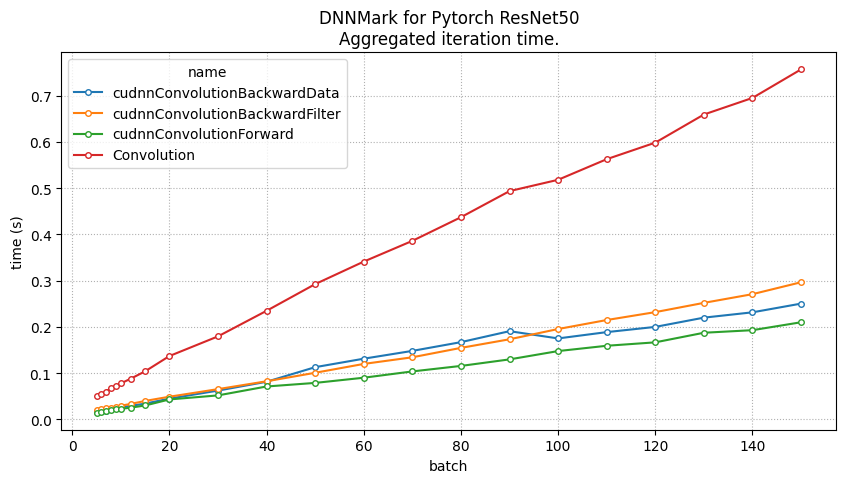

In [39]:
timesT = times.pivot_table(columns='name', index='batch', values='time') #,aggfunc='size')
timesT['Convolution'] = timesT.sum(axis=1)
display(timesT.head())
print(timesT.columns)
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
timesT.plot(marker='o', ms=4, mfc='w', ax=ax)
ax.grid(ls=':', which='major')
ax.grid(ls=':', lw=0.5, which='minor')
plt.title('DNNMark for Pytorch ResNet50\nAggregated iteration time.')
ax.set_ylabel('time (s)')
plt.show()

In [45]:
timesT.reset_index().head()

name,batch,cudnnConvolutionBackwardData,cudnnConvolutionBackwardFilter,cudnnConvolutionForward,Convolution
0,5,0.016353,0.020114,0.014715,0.051182
1,6,0.017911,0.021871,0.015768,0.055550
2,7,0.018915,0.023961,0.017325,0.060201
3,8,0.022126,0.025169,0.021072,0.068367
4,9,0.023594,0.027368,0.022048,0.073010


In [46]:
csv_file = 'DNNMark_resnet50_traces_convolution_time.csv'
csv_file = os.path.join(logdir, csv_file)
timesT.reset_index().to_csv(csv_file,index=False)

In [47]:
print(csv_file)

logs/DL.cont/dnnmark_resnet50_test_composed_model_microseries_20200816/DNNMark_resnet50_traces_convolution_time.csv
